# ConformETL Class

<font size=4 color="#EBB483">ConformETL creates a DataFrame from a given directory of source files. Then it generates target paths given a set of rules. Finally, the conform method is called and the source files are copied to their target filepaths.

In [47]:
from rolling_pin.conform_etl import ConformETL

<font size=4 color="#EBB483"><br>Below is YAML configuration which converts a source repo structure into a target repo structure.

In [48]:
config = r'''
source_rules:
  - path: "/home/ubuntu/rolling-pin/resources/conform_repo"
    include: "\\.py|toml|README|LICENSE"
    exclude: "pdm\\.toml"
rename_rules:
  - regex: ".*conform_repo"
    replace: "/tmp/target"
group_rules:
  - name: test
    regex: "__init__|_test"
  - name: prod
    regex: "__init__"
line_rules:
  - group: prod
    exclude: test
'''

config_path = '/tmp/config.yaml'
with open(config_path, 'w') as f:
    f.write(config)

<font size=4 color="#EBB483"><br>ConformETL is essentially a build tool for generating directory structures of given files.

In [49]:
etl = ConformETL.from_yaml(config_path)
etl

                                                                      SOURCE                                             TARGET               GROUPS  LINE_RULE
                /home/ubuntu/rolling-pin/resources/conform_repo/FAKE-LICENSE                           /tmp/target/FAKE-LICENSE               [base]           
                 /home/ubuntu/rolling-pin/resources/conform_repo/FAKE-README                            /tmp/target/FAKE-README               [base]           
  /home/ubuntu/rolling-pin/resources/conform_repo/docker/fake-pyproject.toml             /tmp/target/docker/fake-pyproject.toml               [base]           
      /home/ubuntu/rolling-pin/resources/conform_repo/python/bar/__init__.py                 /tmp/target/python/bar/__init__.py         [test, prod]          X
           /home/ubuntu/rolling-pin/resources/conform_repo/python/bar/baz.py                      /tmp/target/python/bar/baz.py               [base]           
/home/ubuntu/rolling-pin/resources/confo

<font size=4 color="#EBB483"><br>**to_dataframe** exports the above table to a DataFrame.

In [50]:
etl.to_dataframe()

,source,target,groups,line_rule
0,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/FAKE-LICENSE,[base],False
1,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/FAKE-README,[base],False
2,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/docker/fake-pyproject.toml,[base],False
3,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/python/bar/__init__.py,"[test, prod]",True
4,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/python/bar/baz.py,[base],False
5,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/python/bar/baz_testerooni.py,[test],False
6,/home/ubuntu/rolling-pin/resources/conform_rep...,/tmp/target/python/foo.py,[base],False


<font size=4 color="#EBB483"><br>We use **to_html** to show a conform graph in which 
<font style="color: #DE958E; background: #242424">&nbsp;red&nbsp;</font> is the target filepath location of the above table, and in
<font style="color: #B6ECF3; background: #242424">&nbsp;cyan&nbsp;</font> the source.

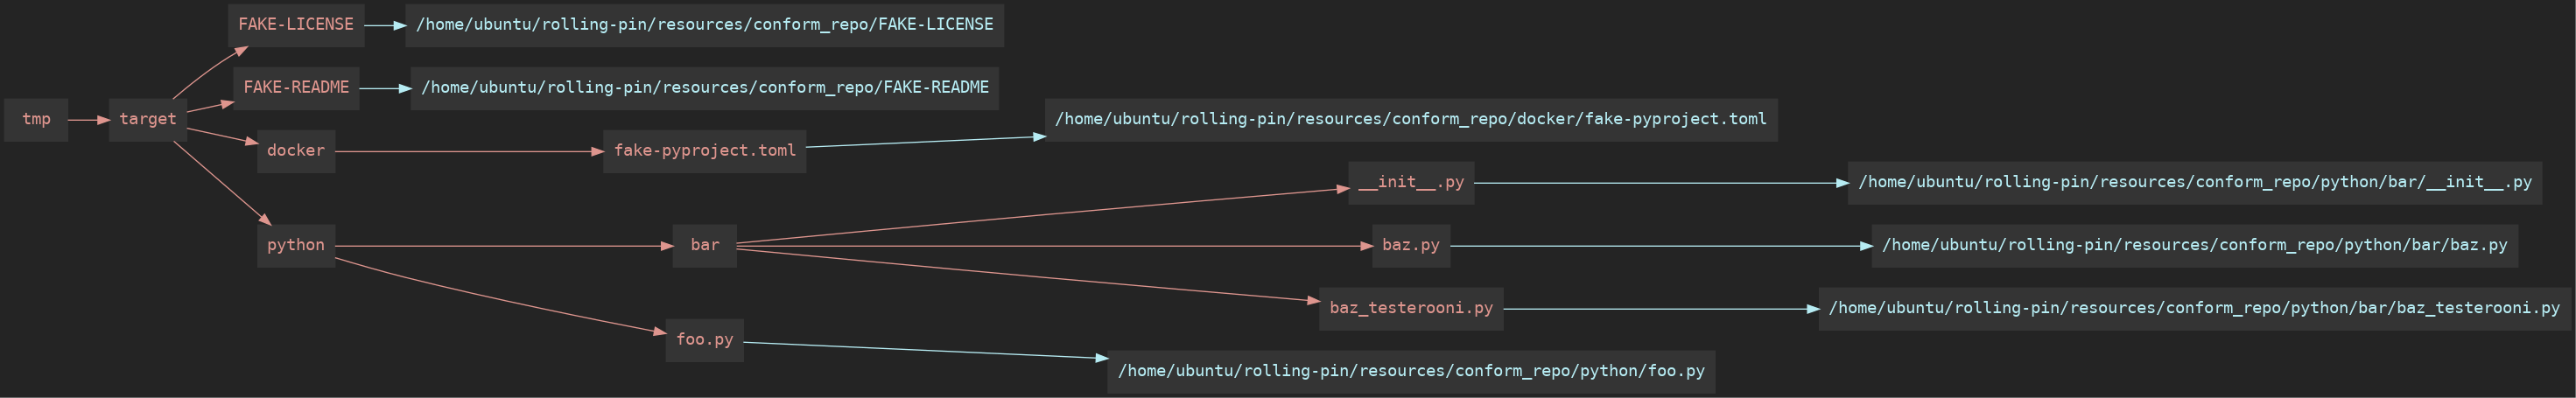

In [51]:
etl.to_html(as_png=True)

<font size=4 color="#EBB483"><br>**to_blob** will export the ConformETL as a BlobETL instance.

In [52]:
etl.to_blob()

<font size=4 color="#EBB483"><br>The **groups** property displays what conform groups the config declares.
    
<font size=4 color="#EBB483">In this case, we have three:
    
* <font size=4 color="#EBB483">base - Always applied during builds
* <font size=4 color="#EBB483">prod - Applied when doing production builds
* <font size=4 color="#EBB483">test - Applied when doing test builds

In [53]:
etl.groups

['base', 'prod', 'test']

<font size=4 color="#EBB483"><br>**conform** is used to copy the source files to the their target locations.
<font size=4 color="#EBB483"><br>Files with lines rules will have their content modified as well.    
    
In this case, we have three:
    
* base - Base group intended to always be applied during builds
* prod - Applied when doing production builds
* test - Applied when doing test builds

In [58]:
!exa --tree /tmp/target

"/tmp/target": No such file or directory (os error 2)


In [59]:
etl.conform(groups=['base', 'prod'])

In [60]:
!exa --tree /tmp/target

/tmp/target
├── docker
│  └── fake-pyproject.toml
├── FAKE-LICENSE
├── FAKE-README
└── python
   ├── bar
   │  ├── __init__.py
   │  └── baz.py
   └── foo.py
